## マルコフ連鎖モンテカルロ法による共重合組成の数値的解法



[目次]  
・概要  
・共重合組成式  
・Alfrey-PriceのQ,e-Scheme  
・モンテカルロ法  
・マルコフ連鎖  
・マルコフ連鎖モンテカルロ法  
・多元共重合組成の数値的解法

概要

高分子設計では、モノマーの投入比率が最終製品の物性に大きな影響を与えます。この投入比率は、連鎖重合による材料開発において重要な要素です。物性への影響は、モノマーの配合比によって線形に加わる場合もあればそうでない場合もあります。この違いの背後には、高分子の一次配列（シーケンス）の影響が考えられます。モノマーがポリマー鎖にどのように組み込まれるか、つまり均一かつランダムに導入されるかは、非常に重要な問いです。以下に具体例を示します。

例えば、スチレン（St）とメチルメタクリレート（MMA）を50/50の比率で混合し、溶液系で攪拌しながらラジカル重合を行った場合を考えます。生成するポリマー鎖の配列は、NMRスペクトルによる連子解析を通じて以下のように推定されるかもしれません：

MMA-MMA-St-MMA-St-St-St-MMA-MMA-St-St-MMA-St-St-MMA-St-MMA-St

この配列からは、StとMMAが交互になることもあれば、同種のモノマーが連続して共重合することも観察されます。これはランダム共重合と呼ばれます。一方、スチレン（St）と無水マレイン酸（MAH）を組み合わせた共重合では、以下のようにモノマーが交互に付加することが知られています：

St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH-St-MAH

これは交互共重合体と呼ばれ、StラジカルがMAHモノマーに、MAHラジカルがStモノマーに選択的に付加することによるものです。この選択性は、モノマーとラジカル種の反応性（反応速度）が組み合わせによって異なるために生じます。

### モノマーの反応性比と共重合様式の決定

スチレン（St）/メチルメタクリレート（MMA）系とスチレン（St）/無水マレイン酸（MAH）系の一次構造の違いは、モノマーの反応性比によって説明されます。反応性比とは、2種類のモノマーAとBを共重合させた際、AからAへのホモ付加反応速度 kAAとAからBへのヘテロ付加反応速度kABの比率を示し、
$$r_{AB} = \frac{k_{AA}}{ k_{AB}}$$

 で表されます。この比率は、共重合する際のモノマーの振る舞いや生成するポリマーの構造を予測するのに役立ちます。反応性比の実測方法として、Fineman-Loss法が有名ですが、ここでは、反応性比を実測する方法ではなく、パラメータによる推定方法としてよく知られているAlfrey-PriceのQe-Schemeについて説明します。Qe-Schemeとは、モノマーの二重結合に対し、Q値とe値の2つの因子を仮定し、それらからモデル式に当てはめて反応速度定数を予測する方法です。Q値は二重結合の共鳴安定性に関する因子、e値は二重結合の電子吸引性に関する因子となります。$M_A$ラジカルと$M_B$モノマーの反応速度定数$k_{AB}$は次式で表されます。  

$$M_A*\ +\ M_B\ ->\ M_A-M_B*$$
$$k_{AB}=P_{A}Q_{B}exp(-e_{A}e_{B})$$

反応速度はAラジカルの活性が高く、Bラジカルが安定であるほど早くなります。そして、付加するモノマー同士は電子供与性と電子吸引性の組み合わせ(ドナーとアクセプターの関係)であるほど早いことを意味します。

### 反応速度から反応確率を導く
Qe-Schemeにより任意のモノマーの反応速度が表現できることが分かりました。したがって反応性比もQe-Schemeにより表現できます。今回は反応性比と似た考え方で、反応確率を定義した。反応確率は、活性種が起こしうる全ての反応に対する、特定の反応が起こる確率として考える。例えばAラジカルからBモノマーへの付加反応確率$P_{AB}$について考えると、
$$M_A*\ +\ M_A\ ->\ M_A-M_A*\ \ \ \ \ \ (1)$$
$$M_A*\ +\ M_B\ ->\ M_A-M_B*\ \ \ \ \ \ (2)$$  

の二つの反応が起こりえます。ここで、反応(1)の反応速度が反応(2)の反応速度の2倍だとすれば,(1)が起きる確率は66%,(2)が起きる確率は33%であると考えられます。
つまり$M_A*$ラジカルが起こしうる付加反応速度全体に対する$M_B$モノマーへの付加反応速度$k_{AB}$の分率によって表現できる。 
すなわち、

$$P_{AB}=\frac{R_{AB}}{R_{AB}+R_{AA}}$$  
$$=\frac{k_{AB}[M_{A}*][M_{B}]}{k_{AB}[M_{A}*][M_{B}]+k_{AA}[M_{A}*][M_{A}]} $$  
$$=\frac{k_{AB}[M_{B}]}{k_{AB}[M_{B}] + k_{AA}[M_{A}]} $$  

ここで、Alflay-priceの式を用いて式を整理すると  

$$=\frac{[M_{B}]P_{B}Q_{A}exp(-e_{A}e_{A}) }{[M_{B}]P_{A}Q_{B}exp(-e_{A}e_{B})+[M_{A}]P_{A}Q_{A}exp(-e_{A}e_{A})}$$   
$$=\frac{[M_{B}]Q_{B}exp(-e_{A}e_{B}) }{[M_{B}]Q_{B}exp(-e_{B}e_{A})+[M_{A}]Q_{A}exp(-e_{A}e_{A})}$$  

### 多元共重合への拡張  
上記の例は二種類のモノマー間の関係です。つまりに二元共重合における反応を考えます。一方で、実際には多数のモノマーを組み合わせて重合を行う場合が多く、そのような重合系のモノマー消費挙動を表現するには、上記の反応性比の概念を拡張して利用する必要があります。今、N種のモノマー$M_1$,$M_2$...$M_A$...$M_B$...$M_n$を共重合させた系における、ラジカル$M_A*$からモノマー$M_B$へのラジカル付加反応  

$$M_A*\ +\ M_B\ ->\ M_A-M_B*$$  

の反応確率を$P_{AB}$とすると、

$$
P_{AB}= \frac{[M_{B}]Q_{B}exp(-e_{A}e_{B}) }{\sum_{i=1}^n [M_{i}]Q_{i}exp(-e_{A}e_{i})}
$$

によって、ラジカル種とモノマー種の組み合わせで反応確率が決定されます。
ラジカル種により、付加するモノマー種の反応確率分布が決定されますが、反応後にはまたラジカル種が変わり、反応が起きる確率分布が変わります。



高分子末端にモノマーが順次反応していき、末端の活性種が遷移する際の、遷移確率行列は、

\begin{equation}
T = \begin{bmatrix}
P_{AA} & P_{AB} \\
P_{BA} & P_{BB}
\end{bmatrix}
\end{equation}

反応が起こる前の、事前濃度ベクトルを

\begin{equation}
C(X) = \begin{bmatrix}
M_{A} & M_{B}
\end{bmatrix}
\end{equation}

とする。乱数発生機により、一様乱数ベクトルRが生じたら
$$
R-T
$$らわされる。n}

## モンテカルロ法
モンテカルロ法は、一様乱数の生成による試行を繰り返すことで確率分布の数値解の導出を行う手法である。確率分布を解析的に得ることが困難な事象に対して強力なツールです。簡単に言えば、実際の現象に近い確率密度分布を持つ「ひずんださいころ」を何度も投げることで、統計的データを生成し、現象を再現する事です。重合における、反応確率の分布は、

In [119]:
#モノマー1の濃度m,Q値,e値
m1 = 0.5
Q1 = 1.0
e1 = -0.6

#モノマー2の濃度m,Q値,e値
m2 = 0.5
Q2 = 1.0
e2 = -0.8

#事前濃度ベクトル
M= np.array([m1,m2])
Q = [m1,m2]
e = [e1,e2]


#反応確率を導出する関数

def react_prob(M,Q,e):

    #iはラジカル種のindex
    col=[]
    for i in range(len(M)): 
        #jは付加するモノマー種のindex
        row=[]
        for j in range(len(M)):
            bunsi=  M[j]*Q[j]*np.exp(-e[i]*e[j])
            bunbo_sum=0
            
            #kは合計する為だけのもの
            for k in range(len(M)):   
                bunbo_sum += M[k]*Q[k]*np.exp(-e[i]*e[k])
                
            P_ij = bunsi/bunbo_sum
            
            row.append(P_ij)
            
        col.append(row)
        
    return np.array(col)
                
        

#遷移確率行列
react_prob(M,Q,e)

array([[0.52996405, 0.47003595],
       [0.53991488, 0.46008512]])

In [120]:
def montecalro_dice(react_prob,monomer_conc):

    #react_probを1行ごとに処理していく
    for n,elem in enumerate(react_prob):
        #0~1の一様乱数を生成
        random_number=np.random.random()     
        #列ごとの乱数の該非判定
        #判定しきい値の初期化
        threshold=0
        for m,elem2 in enumerate(elem):
            #しきい値の更新
            threshold += elem2
            if random_number <= threshold:
                # 該当したら1カウント減らす。
                monomer_conc[n][m] -= 1
                break
    return monomer_conc

In [121]:
#初期値
T = react_prob(M,Q,e)
C = np.ones(T.shape)*50
conc_log = []
for iteration in range(50):
    montecalro_dice(T,C)
    C = montecalro_dice(T,C)
    conc_log.append(np.sum(C,axis=0))

In [118]:
conc_log

[array([99., 97.]),
 array([96., 96.]),
 array([95., 93.]),
 array([92., 92.]),
 array([89., 91.]),
 array([88., 88.]),
 array([85., 87.]),
 array([82., 86.]),
 array([79., 85.]),
 array([77., 83.]),
 array([75., 81.]),
 array([73., 79.]),
 array([71., 77.]),
 array([69., 75.]),
 array([66., 74.]),
 array([64., 72.]),
 array([60., 72.]),
 array([57., 71.]),
 array([55., 69.]),
 array([52., 68.]),
 array([48., 68.]),
 array([46., 66.]),
 array([44., 64.]),
 array([42., 62.]),
 array([39., 61.]),
 array([37., 59.]),
 array([35., 57.]),
 array([32., 56.]),
 array([32., 52.]),
 array([30., 50.]),
 array([26., 50.]),
 array([24., 48.]),
 array([22., 46.]),
 array([20., 44.]),
 array([17., 43.]),
 array([16., 40.]),
 array([14., 38.]),
 array([12., 36.]),
 array([10., 34.]),
 array([ 7., 33.]),
 array([ 3., 33.]),
 array([ 0., 32.]),
 array([-3., 31.]),
 array([-5., 29.]),
 array([-6., 26.]),
 array([-8., 24.]),
 array([-11.,  23.]),
 array([-13.,  21.]),
 array([-17.,  21.]),
 array([-19., 

このとき、1~6のいずれの数字においても起こる確率分布は0.166です。さいころの場合には、
事象がカテゴリ変数である為、不連続な値を取りますが、連続した値をとこともできるはずです。
その場合には、binごとの確率分布をbinの幅で割った値を考える必要があり、この値が確率密度です。
そして、事象変数に対する確率密度の分布が、確率密度分布となります。

たとえば、平均0,標準偏差1のガウス分布は下記のようになります。
ガウス分布の確率密度関数は以下の式で与えられます。

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$


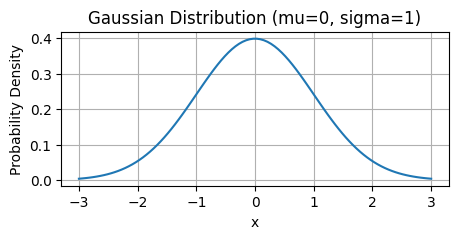

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# 平均と標準偏差を定義
mu = 0  # 平均
sigma = 1  # 標準偏差

# ガウス分布（正規分布）のPDF（確率密度関数）をプロット
x = np.linspace(-3*sigma + mu, 3*sigma + mu, 100)
y = norm.pdf(x, mu, sigma)
plt.figure(figsize=(5,2))
plt.plot(x, y)
plt.title('Gaussian Distribution (mu=0, sigma=1)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

この確率密度分布に従う統計データを疑似的に生成することが出来ます。
確率変数xを、幅0.5のbinに分割して、各確率分布を算出してみます。


In [3]:

bin_width=0.5
x_bins = np.arange(-10,10,bin_width)

from scipy.integrate import quad

# 平均と標準偏差を定義
mu = 0  # 平均
sigma = 1  # 標準偏差

# 確率密度関数(ここではガウス関数)
def gauss_function(x, mu=0, sigma=1):
    f1 = norm.pdf(x, mu, sigma)
    return f1

# 積分範囲　-∞　~　xの範囲は、生成した乱数がその範囲に該当するかどうかを判別
intg_ls =[]

for x in x_bins:
    integral, error = quad(gauss_function, -np.inf, x)
    intg_ls.append(integral)
    

In [4]:
def montecalro_dice(intg_ls):
    #初期化
    out = 0
    #0~1の一様乱数を生成
    random_number=np.random.random()

    #生成した乱数がどのbinに該当するかを判別する。
    for n,prob in enumerate(intg_ls):
        if random_number <= prob:
            out = x_bins[n]
            break
    return out
                

In [5]:
#サンプリング数
sampling_num = 10000
sampling_data= []
#サンプリングデータ生成
for _ in range(sampling_num):
    data_x = montecalro_dice(intg_ls)
    sampling_data.append(data_x)

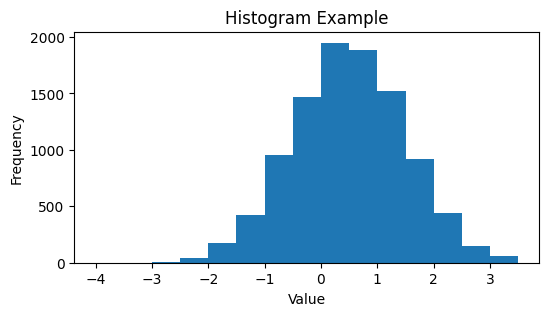

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,3))

# ヒストグラムの描画
plt.hist(sampling_data,bins=15)
# タイトルと軸ラベルの追加
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# ヒストグラムの表示
plt.show()
